# **Tugas 3 Laboratorium Kecerdasan Buatan - Naive Bayes**
(Nama / NIM)

Di tugas ini, anda bertugas untuk melakukan beberapa hal. 

* **Tugas pertama adalah menjelaskan dengan definisi anda sendiri, bagaimana algoritma naive bayes bekerja.**

* **Tugas kedua adalah anda harus membuat model naive bayes, dan melakukan prediksi dengan model tersebut!**

## **1. DEFINISI NAIVE BAYES**

Definisi Naive Bayes menurut saya adalah .....

> Naive Bayes adalah sebuah **teknik prediksi berdasarkan probabilitas yang sederhana dan penerapan teorema Bayes (atau Bayes rule) dengan mengasumsikan independensi (kumpulan fitur yang digunakan untuk mengklasifikasi) yang kuat**. Dalam hal ini, diasumsikan bahwa tidak adanya atau adanya Peristiwa tertentu dari suatu kelompok tidak terkait atau tidak ada hubungannya dengan tidak adanya atau kehadiran orang lain Peristiwa. Secara sederhananya, **setiap kumpulan fitur tidak saling mempengaruhi satu sama lain** sehingga hal ini dapat menyederhanakan perhitungan nantinya.

## **2. MODEL DAN PREDIKSI NAIVE BAYES**

Buatlah model naive bayes disini. Gunakan dataset yang dipakai di KNN sebelumnya.

In [1]:
# Import library yang diperlukan

# Baca Dataset

# Buat Model

In [2]:
pip install fitter

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Panggil Library
import pandas as pd               # Untuk tabel data
from scipy import stats           # Untuk statistik
import numpy as np                # Untuk perhitungan matriks dan data
import seaborn as sns             # Untuk visualisasi data
import matplotlib.pyplot as plt   # Untuk menampilkan data
%matplotlib inline 

import statsmodels as sm
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from fitter import Fitter

import warnings
warnings.filterwarnings('ignore')

### Load Dataset
Disini panggil kedua dataset kalian, yang pertama untuk klasifikasi dan yang kedua untuk regresi.

Untuk dataset regresi, kalian bebas menggunakan dataset apapun. Pastikan tidak sama dengan teman kalian. 

Jika sama, maka bagian regresi akan dianggap 0.

In [4]:
# DataFrame pertama untuk klasifikasi
gl = pd.read_csv('Galaxy_2.csv')

Coba panggil kedua data kalian.

In [5]:
# Panggil dataset
gl

,alpha,u,class
0,135.689107,23.87882,GALAXY
1,144.826101,24.77759,GALAXY
2,142.188790,25.26307,GALAXY
3,338.741038,22.13682,GALAXY
4,345.282593,19.43718,GALAXY
...,...,...,...
99995,39.620709,22.16759,GALAXY
99996,29.493819,22.69118,GALAXY
99997,224.587407,21.16916,GALAXY
99998,212.268621,25.35039,GALAXY


### Data Cleaning

Kita lihat apakah ada data yang kosong ditiap kolom.

In [6]:
gl.isnull().sum()

alpha    0
u        0
class    0
dtype: int64

### Data Wrangling

In [7]:
# Disini kita lihat bentuk data

gl.shape

(100000, 3)

In [8]:
gl.describe()

,alpha,u
count,100000.000000,100000.000000
mean,177.629117,21.980468
std,96.502241,31.769291
min,0.005528,-9999.000000
25%,127.518222,20.352353
50%,180.900700,22.179135
75%,233.895005,23.687440
max,359.999810,32.781390


In [9]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   alpha   100000 non-null  float64
 1   u       100000 non-null  float64
 2   class   100000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


karena kolom class masih bertipe object, mari kita ganti ke tipe category

In [10]:
# ubah tipe data

gl["class"] = gl["class"].astype("category")

gl.dtypes

alpha     float64
u         float64
class    category
dtype: object

### Exploratory Data Analysis

Disini, kita akan lihat kondisi data untuk beberapa variabel. Disini juga kita lihat hubungan antar variabel, terutama bagaimana beberapa kolom berhubungan dengan kolom yang ingin kita prediksi, kolom class.

Pertama, coba kita lihat class, bagaimana komposisinya?

In [11]:
gl['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

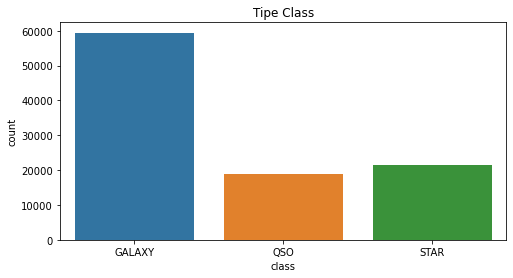

In [12]:
# Kita gunakan barchart

plt.figure(figsize=(8, 4))
sns.countplot(x='class',data=gl)
plt.title('Tipe Class')
plt.show()

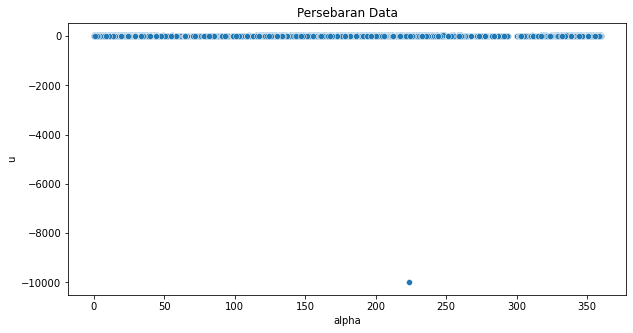

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(
  x=gl['alpha'],
  y=gl['u'],
)
plt.title('Persebaran Data')
plt.show()

Data diatas didapatkan dari penampakan awal bentuk data kita. Oleh karena terdapat satu outlier yang tidak terlalu menganggu bentuk data, maka saya mencoba menghilangkan outlier tersebut agar kita bisa melihat distribusi data dengan baik.

In [14]:
# 13. code here

gl[gl['u'] < -1000]

,alpha,u,class
79543,224.006526,-9999.0,STAR


In [15]:
# 11. code here

gl = gl[(gl.u != -9999.0)]
gl

,alpha,u,class
0,135.689107,23.87882,GALAXY
1,144.826101,24.77759,GALAXY
2,142.188790,25.26307,GALAXY
3,338.741038,22.13682,GALAXY
4,345.282593,19.43718,GALAXY
...,...,...,...
99995,39.620709,22.16759,GALAXY
99996,29.493819,22.69118,GALAXY
99997,224.587407,21.16916,GALAXY
99998,212.268621,25.35039,GALAXY


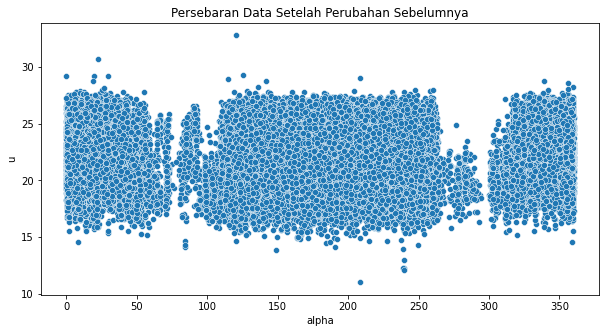

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(
  x=gl['alpha'],
  y=gl['u'],
)
plt.title('Persebaran Data Setelah Perubahan Sebelumnya')
plt.show()

Selanjutnya, coba kita lihat data-data yang numerik.

In [17]:
# Kita lihat saja secara sekilas dengan describe
gl.describe()

,alpha,u
count,99999.000000,99999.000000
mean,177.628653,22.080679
std,96.502612,2.251068
min,0.005528,10.996230
25%,127.517698,20.352410
50%,180.900527,22.179140
75%,233.895005,23.687480
max,359.999810,32.781390


Coba kita cek distribusi tiap-tiap kolom ini.

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000353,1217.71711,-1.946255e+06,inf,0.071141,0.0


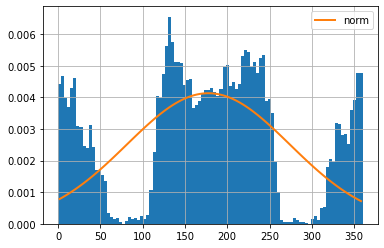

In [18]:
test = Fitter(gl['alpha'], distributions = ['norm'])
test.fit()
test.summary()

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.012265,1131.205913,-1.591351e+06,inf,0.029124,4.014655e-74


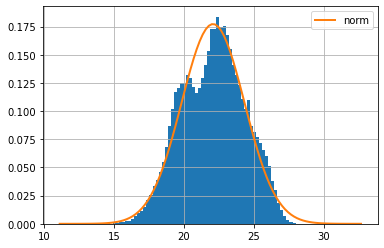

In [19]:
test = Fitter(gl['u'], distributions = ['norm'])
test.fit()
test.summary()

#### **EDA Conclusion**

- Terdapat 3 bagian dari kolom class, yaitu GALAXY(59445), QSO(21594), dan STAR(18960). 
- Semua data numerik kita terdisribusi normal, kecuali alpha.

### Features Encoding

untuk memudahkan mesin dalam mengolah data kita, mari kita ubah data pada fitur class menjadi numeric.

In [20]:
gl['class'].unique()

['GALAXY', 'QSO', 'STAR']
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [21]:
#kita gunakan mapping method

map_dict = {
    'GALAXY':0,
    'QSO': 1,
    'STAR': 2 
}

In [22]:
gl['class'] = gl['class'].map(map_dict)

In [23]:
gl

,alpha,u,class
0,135.689107,23.87882,0
1,144.826101,24.77759,0
2,142.188790,25.26307,0
3,338.741038,22.13682,0
4,345.282593,19.43718,0
...,...,...,...
99995,39.620709,22.16759,0
99996,29.493819,22.69118,0
99997,224.587407,21.16916,0
99998,212.268621,25.35039,0


### Features Scalling

Sebelum menuju evaluasi, mari kita lakukan feature scaling agar data yang akan di traning jadi lebih bagus.

In [24]:
dataset = gl.values
dataset

array([[135.6891066,  23.87882  ,   0.       ],
       [144.8261006,  24.77759  ,   0.       ],
       [142.1887896,  25.26307  ,   0.       ],
       ...,
       [224.5874074,  21.16916  ,   0.       ],
       [212.2686211,  25.35039  ,   0.       ],
       [196.896053 ,  22.62171  ,   0.       ]])

In [25]:
X = dataset[:,1:2] # ket: [baris, kolom] # Variabel Independen
y = dataset[0:,2] # Variabel Dependen (label)

In [26]:
# data pada fitur u

X

array([[23.87882],
       [24.77759],
       [25.26307],
       ...,
       [21.16916],
       [25.35039],
       [22.62171]])

In [27]:
# data pada fitur class

y

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.59134705],
       [0.63260311],
       [0.65488801],
       ...,
       [0.46696604],
       [0.65889624],
       [0.53364217]])

> Data pada dataset sudah bersih dan siap untuk dilakukan pemodelan

## 3. Model - Klasifikasi dengan Naive Bayes
Disini, gunakan data pertama kalian untuk membentuk model Naive Bayes. (Dijelaskan di Colab Modul 4)

In [29]:
# Buat objek model KNN

# Latih Model

In [30]:
# Prediksi hasil naive bayes

In [31]:
# Setelah itu, lakukan prediksi dengan model Naive Bayes yang anda buat.

### Split data menjadi training dan testing

Pertama, **kita bagi dataset menjadi training dan tes**. Mari kita alokasikan 70% untuk training, dan 30% untuk testing.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X_scale, y, test_size=0.3
)

In [33]:
import numpy as np

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

>Kemudian, kita bentuk model bertipe GaussianNB karena data yang kita punya termasuk tipe data kontinu. `Gaussian Naive Bayes cocok untuk data kontinu`. 

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Setelah itu, kita coba buat prediksi menggunakan data testing dan kita bandingkan.

In [35]:
y_pred=model.predict(X_test)
gl_test = pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
gl_test 

,Actual Status,Predicted Status
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,2.0,0.0
...,...,...
29995,0.0,0.0
29996,2.0,0.0
29997,1.0,0.0
29998,0.0,0.0


## **4. Model Evaluation**
Disini, kita evaluasi kemampuan model, seperti seberapa akurat model kita.

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.97      0.75     17867
         1.0       0.00      0.00      0.00      5686
         2.0       0.59      0.12      0.21      6447

    accuracy                           0.61     30000
   macro avg       0.40      0.37      0.32     30000
weighted avg       0.49      0.61      0.49     30000



In [38]:
print(confusion_matrix(y_test,y_pred))

[[17381     0   486]
 [ 5615     0    71]
 [ 5646     0   801]]


In [39]:
print(accuracy_score(y_test,y_pred)*100)

60.60666666666666


> Berdasarkan evaluasi model yang kita buat, bisa dilihat bahwa hasilnya tidak cukup baik sehingga diperlukan peningkatan model selanjutnya dengan cara hyperparameter tuning (Model Optimization) sehingga nilai dari evaluasi model bisa meningkat.